# Sprint 6: Machine Learning (Regression models)

Exercicis per practicar amb regressions.
Començarem important el dataset housing data i farem el preprocessament que ja vam fer a la tasca 5.

In [61]:
import pandas as pd
df_housing = pd.read_csv('/home/sole/Documents/DS/Sprint 5/housing data.csv', header=None)
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [62]:
print(df_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [63]:
df_housing.shape

(506, 14)

Podem observar que el DataFrame sembla ser un conjunt de dades amb 506 entrades. Hi ha un total de 14 columnes, cada una representant una variable diferent. Els tipus de dades i la manca de valors nuls suggereixen que el conjunt de dades està relativament net i preparat per a l'anàlisi.

In [64]:
df_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
df_housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

El tipus de dades de les columnes són float64 i int64, tots són númerics i la diferència entre els dos radica en el fet que "float64" pot emmagatzemar nombres decimals amb precisió, mentre que "int64" només emmagatzema nombres enters. 

Visualitzem les correlacions possibles de les dades, per veure si identifiquem patrons:

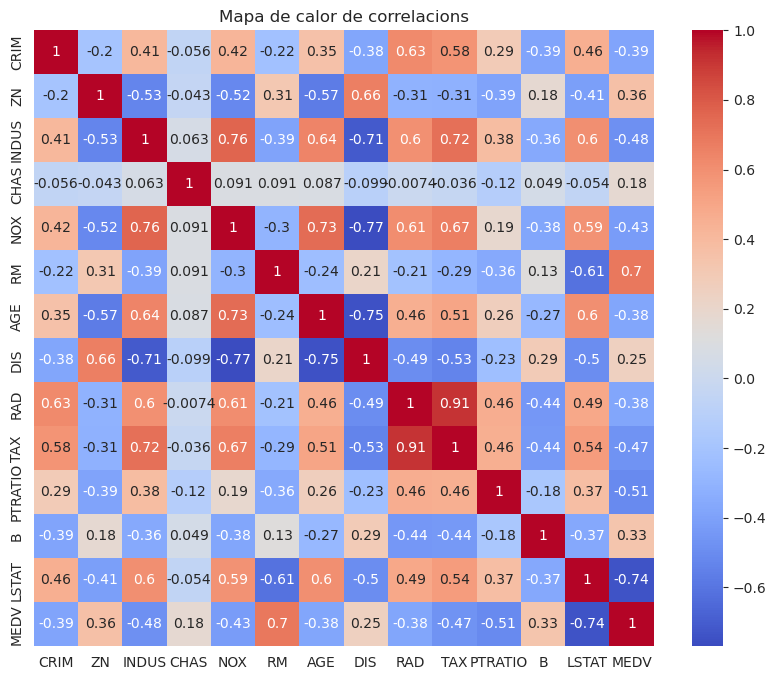

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_housing.corr()

# Creem un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlacions")
plt.show()

El mapa de calor de correlacions mostra la relació entre les diferents variables del conjunt de dades d'habitatges de Boston. Les correlacions més evidents semblent ser les seguents: 
- Correlacions positives amb "MEDV" (valor mitjà de les cases ocupades pel propietari en 1.000 dòlars):
    - 'RM' (Habitacions per habitatge) té una forta correlació positiva de 0,70 amb 'MEDV'.
    - 'ZN' (Proporció de sòl residencial zonificat per a grans lots) i "B" (Proporció de residents negres) també mostren correlacions positives moderades amb "MEDV".
- Correlacions negatives amb 'MEDV':
    - 'LSTAT' (Percentatge d'estatus inferior de la població) té una forta correlació negativa de -0,74 amb 'MEDV'.
    - 'PTRATIO' (ràtio alumnes-professor) i `INDUS' (proporció d'hectàrees comercials no minoristes per ciutat) també mostren correlacions negatives moderades amb 'MEDV'.
- Hi ha una forta correlació negativa (-0,77) entre `DIS` (Distàncies ponderades als centres de treball) i `NOX` (concentració d'òxids nítrics).
- "TAX" (taxa de l'impost sobre béns immobles de valor total per 10.000 $) i "RAD" (índex d'accessibilitat a les carreteres radials) tenen una alta correlació positiva de 0,91.

Aquestes correlacions no impliquent causalitat. Aquests valors indiquen la força i la direcció de les relacions lineals, però la causalitat no es pot inferir només a partir de correlacions.

Tractament de dades:
Realitzarem la prova de normalitat de Shapiro-Wilk a cada columna numèrica del DataFrame `df_housing`, imprimeix les estadístiques de prova i els valors p, i després classifica les variables en dues llistes en funció de si és probable que segueixin un gaussià (normal) distribució o no, utilitzant un nivell de significació de 0,05. La sortida final enumera les variables que probablement són gaussianes i les que probablement no ho són:

In [67]:
from scipy.stats import shapiro
gaussians_list = []
non_gaussians_list = []

for i, (name, dtype) in enumerate(zip(df_housing.columns, df_housing.dtypes)):
    if dtype == 'int64' or dtype == 'float64':
        stat, p = shapiro(df_housing[name])
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('{} is probably Gaussian'.format(name))
            gaussians_list.append(name)
        else:
            print('{} is probably not Gaussian'.format(name))
            non_gaussians_list.append(name)

print('\nLes següents variables són probablement gausianes: ', gaussians_list)
print('\nLes següents variables són probablement no gausianes: ', non_gaussians_list)

stat=0.450, p=0.000
CRIM is probably not Gaussian
stat=0.556, p=0.000
ZN is probably not Gaussian
stat=0.900, p=0.000
INDUS is probably not Gaussian
stat=0.275, p=0.000
CHAS is probably not Gaussian
stat=0.936, p=0.000
NOX is probably not Gaussian
stat=0.961, p=0.000
RM is probably not Gaussian
stat=0.892, p=0.000
AGE is probably not Gaussian
stat=0.903, p=0.000
DIS is probably not Gaussian
stat=0.680, p=0.000
RAD is probably not Gaussian
stat=0.815, p=0.000
TAX is probably not Gaussian
stat=0.904, p=0.000
PTRATIO is probably not Gaussian
stat=0.477, p=0.000
B is probably not Gaussian
stat=0.937, p=0.000
LSTAT is probably not Gaussian
stat=0.917, p=0.000
MEDV is probably not Gaussian

Les següents variables són probablement gausianes:  []

Les següents variables són probablement no gausianes:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


Ara creem un únic diagrama de caixa per a cada variable numèrica del DataFrame `df_housing`, que presenta un resum visual de la distribució, la tendència central i la distribució de les dades entre diverses variables del conjunt de dades:

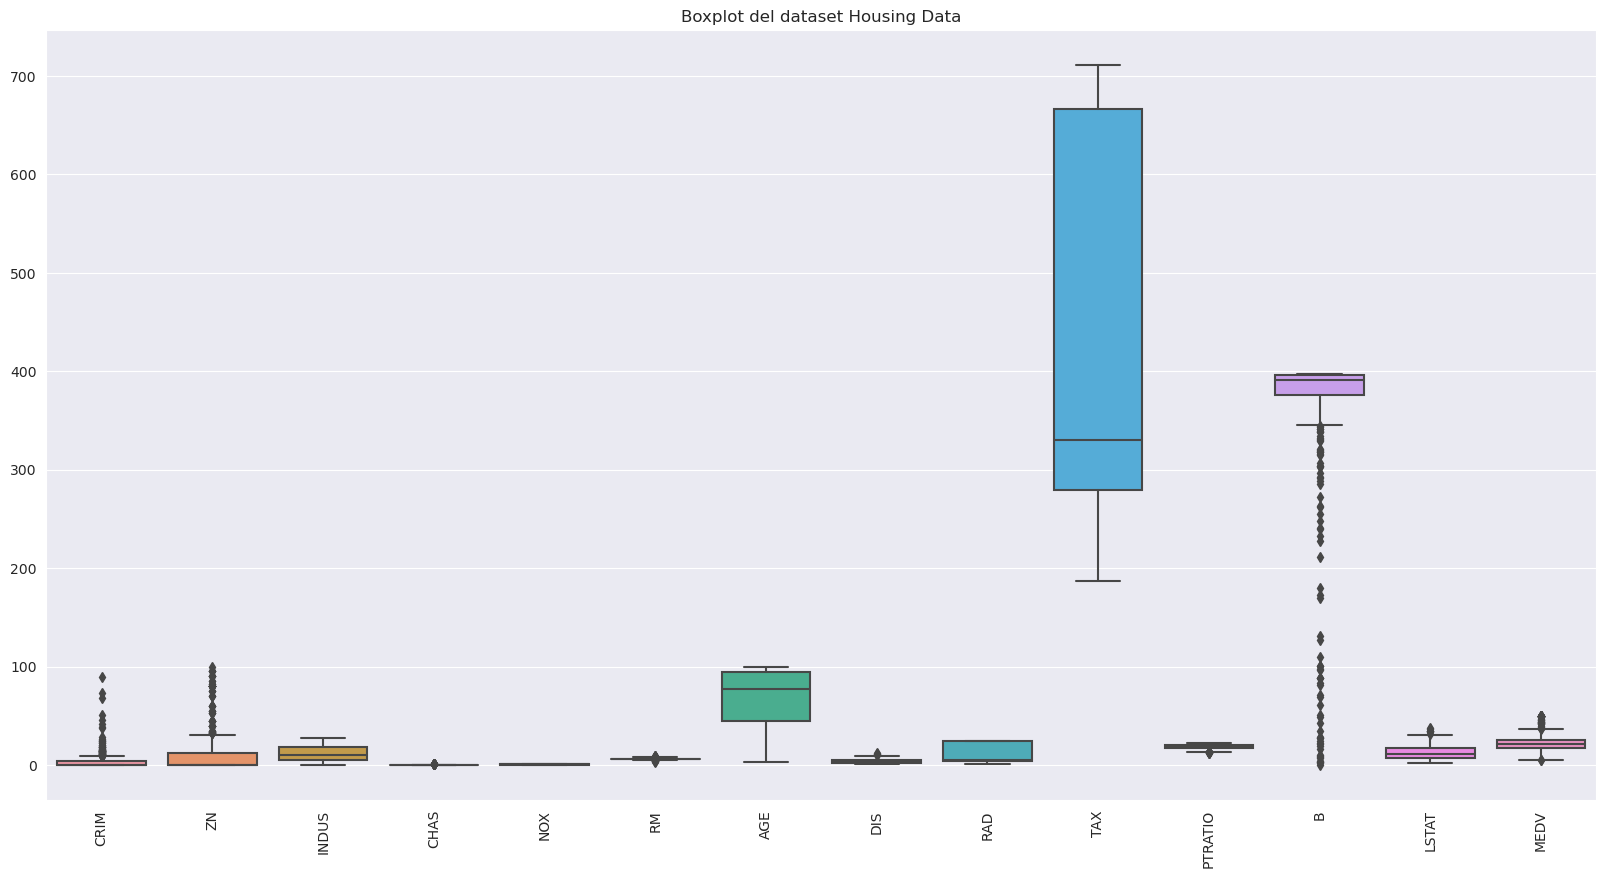

In [68]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_housing)
plt.xticks(rotation=90)
plt.title('Boxplot del dataset Housing Data')
plt.show()

Podem observar que les columnes que tenen outliers, a les quals se'ls aplicarà RobustScaler, són: CRIM, ZN, RM, DIS, PTRATIO, B i LSTAT.
La columna MEDV té outliers, però no la transformarem, de fet serà la variable objectiu.

Les columnes sense outliers a les que se'ls aplicarà MinMax, són: INDUS, NOX, AGE i TAX La columna RAD no mostra outliers i la CHAS en mostra un, però és que és binari.

Transformarem les columnes amb outliers amb RobustScaler i les columnes sense outliers amb MinMax. Ho farem tant per x_train com per x_test. Després ho ajuntarem tot en un nou datatrame "transformat". Amb la columna RAD farem columnes dummies.

In [69]:
df_housing = pd.get_dummies(data = df_housing, columns= ['RAD'])
df_housing.transpose()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004,...,0.2896,0.26838,0.23912,0.17783,0.22438,0.06263,0.04527,0.06076,0.10959,0.04741
ZN,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000,...,9.6900,9.69000,9.69000,9.69000,9.69000,11.93000,11.93000,11.93000,11.93000,11.93000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400,...,0.5850,0.58500,0.58500,0.58500,0.58500,0.57300,0.57300,0.57300,0.57300,0.57300
RM,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400,...,5.3900,5.79400,6.01900,5.56900,6.02700,6.59300,6.12000,6.97600,6.79400,6.03000
AGE,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000,...,72.9000,70.60000,65.30000,73.50000,79.70000,69.10000,76.70000,91.00000,89.30000,80.80000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210,...,2.7986,2.89270,2.40910,2.39990,2.49820,2.47860,2.28750,2.16750,2.38890,2.50500
TAX,296.00000,242.00000,242.00000,222.00000,222.00000,222.00000,311.00000,311.00000,311.00000,311.00000,...,391.0000,391.00000,391.00000,391.00000,391.00000,273.00000,273.00000,273.00000,273.00000,273.00000
PTRATIO,15.30000,17.80000,17.80000,18.70000,18.70000,18.70000,15.20000,15.20000,15.20000,15.20000,...,19.2000,19.20000,19.20000,19.20000,19.20000,21.00000,21.00000,21.00000,21.00000,21.00000


In [70]:
df_tr = df_housing.copy()  # fem una copia del df_housing per fer transformacions

from sklearn.preprocessing import RobustScaler

var_outliers = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

scaling = RobustScaler()

Robust_scaler = scaling.fit(df_tr[var_outliers])
df_tr[var_outliers] = Robust_scaler.transform(df_tr[var_outliers])

df_tr.transpose()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,-0.069593,-0.063755,-0.063760,-0.062347,-0.052144,-0.063048,-0.046792,-0.031143,-0.012592,-0.024053,...,0.009204,0.003302,-0.004837,-0.021886,-0.008937,-0.053930,-0.058759,-0.054450,-0.040867,-0.058164
ZN,1.440000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
INDUS,2.310000,7.070000,7.070000,2.180000,2.180000,2.180000,7.870000,7.870000,7.870000,7.870000,...,9.690000,9.690000,9.690000,9.690000,9.690000,11.930000,11.930000,11.930000,11.930000,11.930000
CHAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NOX,0.538000,0.469000,0.469000,0.458000,0.458000,0.458000,0.524000,0.524000,0.524000,0.524000,...,0.585000,0.585000,0.585000,0.585000,0.585000,0.573000,0.573000,0.573000,0.573000,0.573000
RM,0.496612,0.287940,1.323171,1.069783,1.271680,0.300136,-0.266260,-0.049458,-0.782520,-0.277100,...,-1.109079,-0.561653,-0.256775,-0.866531,-0.245935,0.521003,-0.119919,1.039973,0.793360,-0.241870
AGE,65.200000,78.900000,61.100000,45.800000,54.200000,58.700000,66.600000,96.100000,100.000000,85.900000,...,72.900000,70.600000,65.300000,73.500000,79.700000,69.100000,76.700000,91.000000,89.300000,80.800000
DIS,0.285777,0.569789,0.569789,0.924391,0.924391,0.924391,0.761936,0.888221,0.930835,1.095977,...,-0.132389,-0.101919,-0.258512,-0.261491,-0.229661,-0.236007,-0.297887,-0.336744,-0.265053,-0.227459
TAX,296.000000,242.000000,242.000000,222.000000,222.000000,222.000000,311.000000,311.000000,311.000000,311.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,273.000000,273.000000,273.000000,273.000000,273.000000
PTRATIO,-1.339286,-0.446429,-0.446429,-0.125000,-0.125000,-0.125000,-1.375000,-1.375000,-1.375000,-1.375000,...,0.053571,0.053571,0.053571,0.053571,0.053571,0.696429,0.696429,0.696429,0.696429,0.696429


In [71]:
from sklearn.preprocessing import MinMaxScaler

var_no_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']

MM_scaler = MinMaxScaler().fit(df_tr[var_no_outliers])

df_tr[var_no_outliers] = MM_scaler.transform(df_tr[var_no_outliers])

df_tr.transpose()

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
CRIM,-0.069593,-0.063755,-0.063760,-0.062347,-0.052144,-0.063048,-0.046792,-0.031143,-0.012592,-0.024053,...,0.009204,0.003302,-0.004837,-0.021886,-0.008937,-0.053930,-0.058759,-0.054450,-0.040867,-0.058164
ZN,1.440000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
INDUS,0.067815,0.242302,0.242302,0.063050,0.063050,0.063050,0.271628,0.271628,0.271628,0.271628,...,0.338343,0.338343,0.338343,0.338343,0.338343,0.420455,0.420455,0.420455,0.420455,0.420455
CHAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NOX,0.314815,0.172840,0.172840,0.150206,0.150206,0.150206,0.286008,0.286008,0.286008,0.286008,...,0.411523,0.411523,0.411523,0.411523,0.411523,0.386831,0.386831,0.386831,0.386831,0.386831
RM,0.496612,0.287940,1.323171,1.069783,1.271680,0.300136,-0.266260,-0.049458,-0.782520,-0.277100,...,-1.109079,-0.561653,-0.256775,-0.866531,-0.245935,0.521003,-0.119919,1.039973,0.793360,-0.241870
AGE,0.641607,0.782698,0.599382,0.441813,0.528321,0.574665,0.656025,0.959835,1.000000,0.854789,...,0.720906,0.697219,0.642636,0.727085,0.790937,0.681771,0.760041,0.907312,0.889804,0.802266
DIS,0.285777,0.569789,0.569789,0.924391,0.924391,0.924391,0.761936,0.888221,0.930835,1.095977,...,-0.132389,-0.101919,-0.258512,-0.261491,-0.229661,-0.236007,-0.297887,-0.336744,-0.265053,-0.227459
TAX,0.208015,0.104962,0.104962,0.066794,0.066794,0.066794,0.236641,0.236641,0.236641,0.236641,...,0.389313,0.389313,0.389313,0.389313,0.389313,0.164122,0.164122,0.164122,0.164122,0.164122
PTRATIO,-1.339286,-0.446429,-0.446429,-0.125000,-0.125000,-0.125000,-1.375000,-1.375000,-1.375000,-1.375000,...,0.053571,0.053571,0.053571,0.053571,0.053571,0.696429,0.696429,0.696429,0.696429,0.696429


In [72]:
x, y = df_tr.drop('MEDV', axis=1), df_tr['MEDV']  # MEDV és l'única columna que no hem transformat perquè és la columna objectiu (target)

print('\n', x)
print('\n', y)


          CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0   -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1   -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2   -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3   -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4   -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501 -0.053930  0.00  0.420455     0  0.386831  0.521003  0.681771 -0.236007   
502 -0.058759  0.00  0.420455     0  0.386831 -0.119919  0.760041 -0.297887   
503 -0.054450  0.00  0.420455     0  0.386831  1.039973  0.907312 -0.336744   
504 -0.040867  0.00  0.420455     0  0.386831  0.793360  0.889804 -0.265053   
505 -0.058164  0.00  0.420455     0  0.386831 -0.241870  0.802266 -0.227459   

          TAX   PTRATIO  ...     LSTAT  RAD_1  RA

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('\n', x_train)
print('\n', x_test)
print('\n', y_train)
print('\n', y_test)


          CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
42  -0.031991  0.0  0.236437     0  0.129630 -0.053523  0.038105  0.813875   
58  -0.028389  2.0  0.171188     0  0.139918 -0.086043  0.270855  1.491897   
385  4.605040  0.0  0.646628     0  0.648148 -1.262195  0.980433 -0.576815   
78  -0.055646  0.0  0.453446     0  0.106996  0.031843  0.523172  0.585008   
424  2.374276  0.0  0.646628     0  0.409465 -0.871951  0.697219 -0.370420   
..        ...  ...       ...   ...       ...       ...       ...       ...   
255 -0.061482  6.4  0.116569     0  0.014403 -0.450542  0.166838  1.947009   
72  -0.045860  0.0  0.379399     0  0.057613 -0.194444  0.050463  0.673472   
396  1.562025  0.0  0.646628     0  0.633745  0.266260  0.958805 -0.495637   
235  0.020567  0.0  0.210411     0  0.251029 -0.165989  0.603502  0.143916   
37  -0.049059  0.0  0.201613     0  0.234568 -0.485772  0.397528  0.235327   

          TAX   PTRATIO  ...     LSTAT  RAD_1  RAD_2  RAD_3  

# Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de l'habitatge (MEDV) de l'arxiu adjunt.

In [74]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
br = BayesianRidge()
knr = KNeighborsRegressor()
mlpr = MLPRegressor()

lr.fit(x_train, y_train)
svr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
br.fit(x_train, y_train)
knr.fit(x_train, y_train)
mlpr.fit(x_train, y_train)

models_total = [lr, svr, rfr, gbr, dtr, br, knr, mlpr]

scores_list = []

for model in models_total:
    scores_list.append({model : model.score(x_test, y_test).round(3)})

scores_list

/home/sole/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f009f61c1f0>
Traceback (most recent call last):
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, i

[{LinearRegression(): 0.764},
 {SVR(): 0.61},
 {RandomForestRegressor(): 0.916},
 {GradientBoostingRegressor(): 0.916},
 {DecisionTreeRegressor(): 0.675},
 {BayesianRidge(): 0.765},
 {KNeighborsRegressor(): 0.775},
 {MLPRegressor(): 0.738}]

Hem importat 8 models de regressió, els hem instanciat amb els seus paràmetres per defecte, els hem entrenat i hem utilitzat un bucle for per calcular el score. 
El Gradient Boosting Regressor i Random Forest Regressor funcionen excepcionalment bé, capturant relacions complexes a les dades (0.916).
Els models de Lineal Regression, el Bayesian Ridge i el K-Neighbors Regressor també ofereixen bons ajustos (0.764 - 0.765).
El Decision Tree i el SVR mostren un rendiment relativament inferior, cosa que suggereix que potser no capturen els patrons subjacents amb la mateixa eficàcia (0.61 i 0.675).

Representació gràfica d'aquests resultats:

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f009fa79870>
Traceback (most recent call last):
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


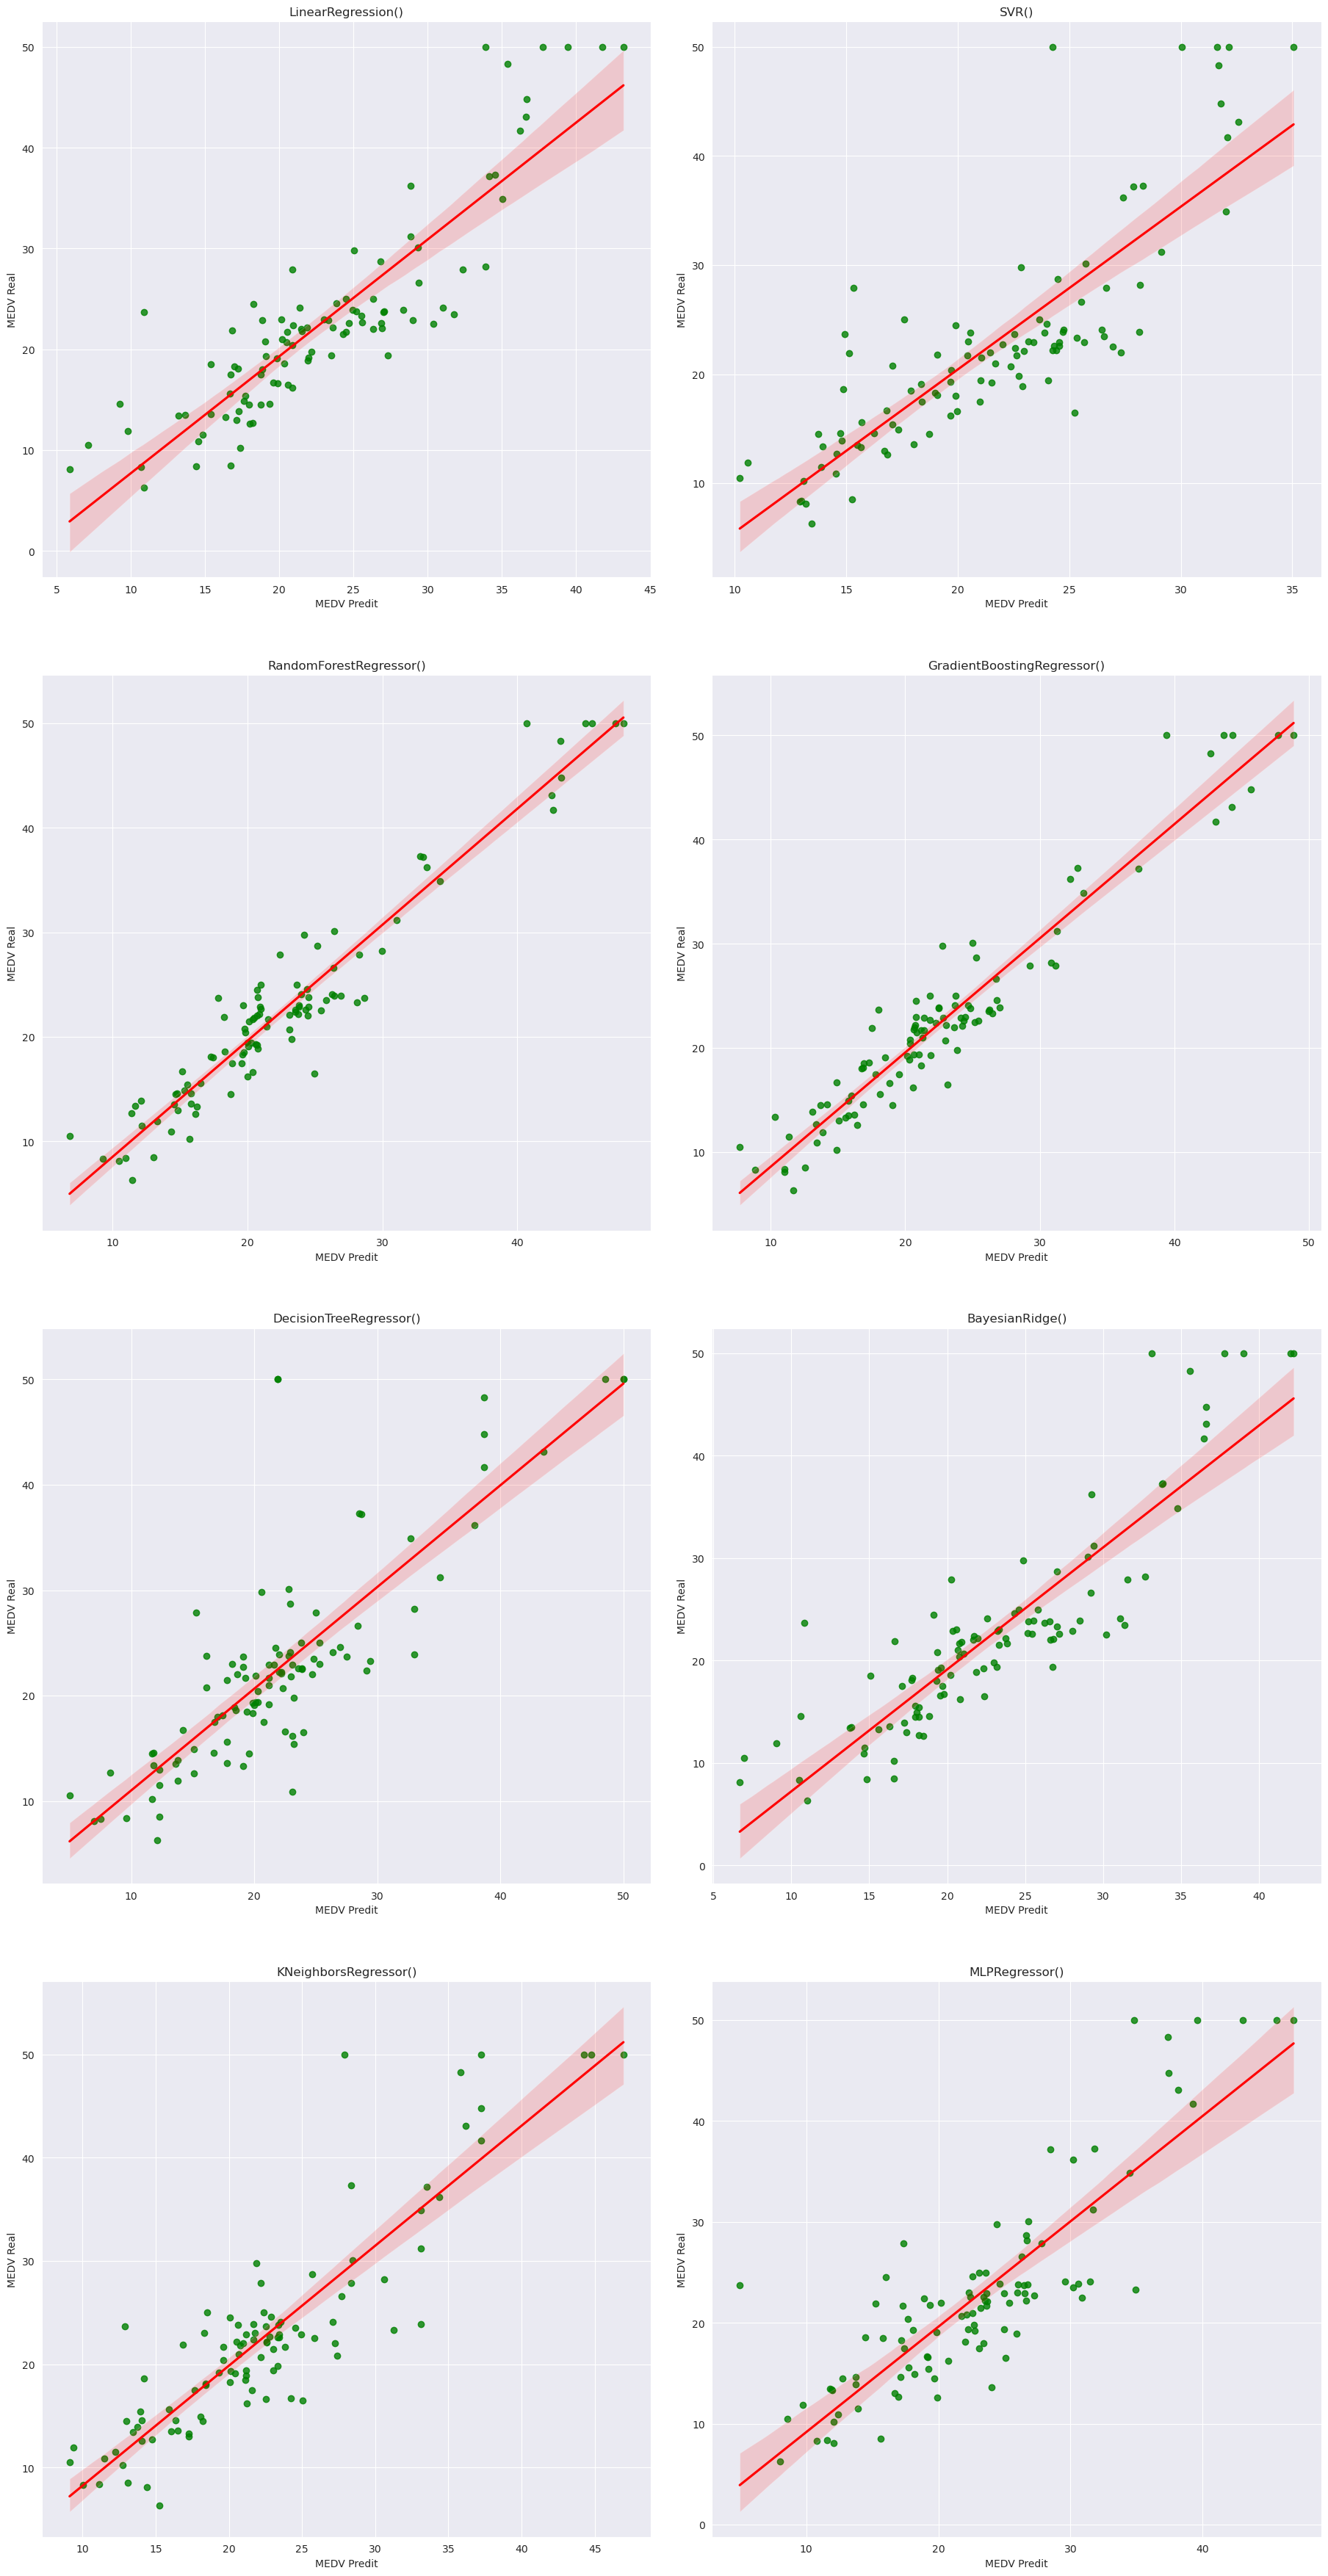

In [78]:
# El valor de MEDV obtingut pel model de predicció vs. el valor real de MEDV
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(18, 35))
i = 0
axs = axs.flatten()
for model in models_total:
    y_pred = model.predict(x_test)
    sns.regplot(x=y_pred, y=y_test, ax=axs[i], color = 'g', line_kws = {"color": "red"})
    axs[i].set_title('{}'.format(model))
    axs[i].set_xlabel('MEDV Predit')
    axs[i].set_ylabel('MEDV Real')
    i += 1
plt.tight_layout(pad=0.4, w_pad=2, h_pad=5.0)

Random Forest i Gradient Boosting Regressor són els models més adaptats, ja que són els models on el MDV real i el predit s'apropen més (punts verds molt a prop de la línia vermella). El model és millor si la línia és una diagonal de pendent 1.

Creem una quadrícula de gràfics residuals per a cada model de regressió a `models_total`, visualitzant les diferències entre els valors previstos i reals (`residuals`) amb els valors reals (`y_test`):

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f009f75f370>
Traceback (most recent call last):
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


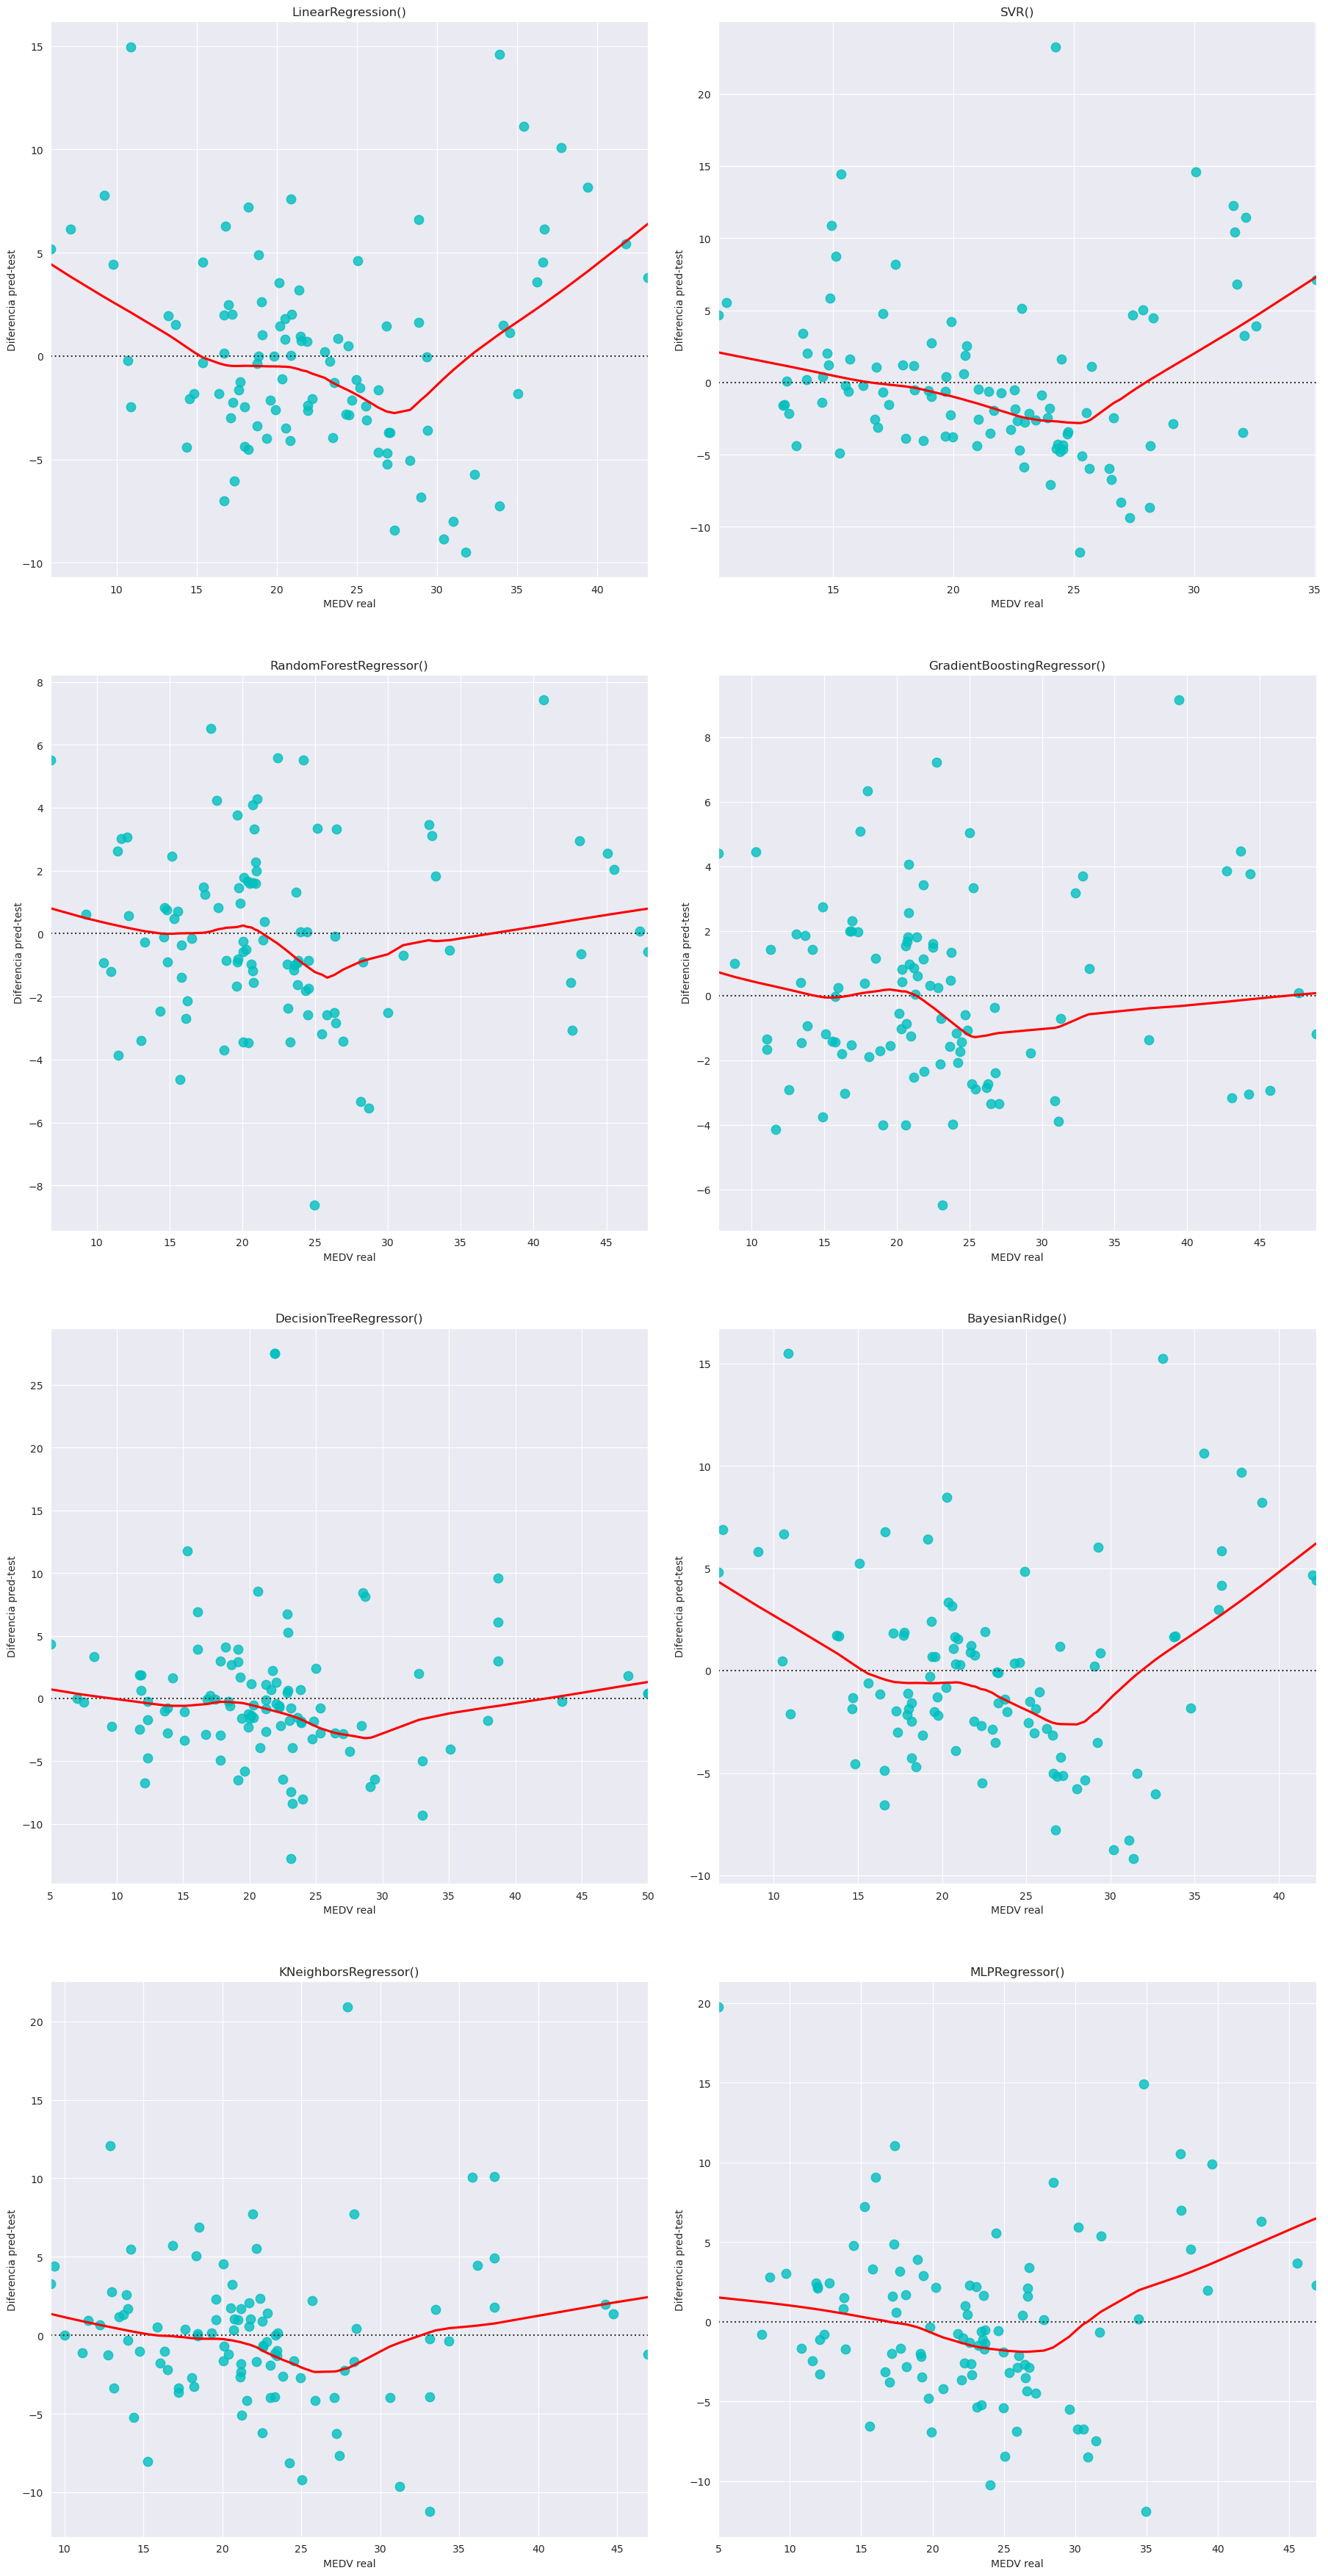

In [80]:
# Els residuals (diferència entre el valor de MEDV obtingut pel model de predicció i el valor real) vs. el valor real de MEDV
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(18, 35))
i = 0
axs = axs.flatten()
for model in models_total:
    y_pred = model.predict(x_test)
    sns.residplot(x=y_pred, y=y_test, ax=axs[i], scatter_kws={"s": 80}, color = 'c', lowess=True, line_kws=dict(color="r"))
    axs[i].set_title('{}'.format(model))
    axs[i].set_xlabel('MEDV real')
    axs[i].set_ylabel('Diferencia pred-test')
    i += 1
plt.tight_layout(pad=0.4, w_pad=2, h_pad=5.0)

Analitzem el rendiment de cada model en funció de les mètriques d'avaluació:

Linear Regression: La regressió lineal funciona raonablement bé, amb un valor R quadrat de 0,72, cosa que indica que al voltant del 72% de la variància de la variable objectiu s'explica pel model. Els valors MAE i RMSE són moderats, cosa que suggereix una precisió decent.

Support Vector Regressor (SVR): El SVR mostra un rendiment decent, però té un MAE i un RMSE lleugerament superiors en comparació amb la regressió lineal. El valor R-quadrat és 0,67, cosa que indica un bon ajust, però és lleugerament inferior a la regressió lineal.

Random Forest Regressor: El Random Forest Regressor supera altres models amb el MAE, MSE i RMSE més baix. El valor R-quadrat de 0,80 indica un ajust fort i la naturalesa del conjunt de Random Forest ajuda a gestionar relacions complexes a les dades.

Gradient Boosting Regressor: L'augment del gradient funciona bé, amb un valor R-quadrat competitiu de 0,78. Proporciona un bon equilibri entre precisió i complexitat del model. Els valors MAE i RMSE són raonables.

Decision Tree Regressor: El regressor de l'arbre de decisions mostra els valors d'error més alts entre els models, cosa que indica que pot ser que no es generalitzi bé a dades no vistes. El valor R-quadrat també és més baix, cosa que suggereix que podria estar sobreajustat.

Bayesian Ridge:El Bayesian Ridge funciona raonablement bé, amb un valor R-quadrat de 0,74. Proporciona un bon equilibri entre simplicitat i precisió, tal com es reflecteix en els valors MAE i RMSE.

K-Nearest Neighbors (KNN): El KNN funciona bé amb un valor R-quadrat de 0,73. És un model senzill, però el seu rendiment és competitiu amb altres models més complexos.

Multi-layer Perceptron (MLP):El MLP mostra un bon rendiment amb un valor R-quadrat competitiu de 0,70. És un model potent, però pot ser que requereixi ajustaments i més dades per assolir tot el seu potencial.

Conclusió: Random Forest Regressor i Gradient Boosting Regressor destaquen com els millors rendiments amb valors d'error més baixos i R-quadrat més alt. Aquests models ofereixen un bon equilibri.

# Exercici 2
Compara’ls en base al MSE i al R2.

A continuació mostrem els codis per calcular el coeficient R2 i el mean squared error per cada un dels models.

In [81]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_list = []
mse_list = []

for model in models_total:
    r2_list.append({model : r2_score(y_test, model.predict(x_test)).round(3)})
    mse_list.append({model : mean_squared_error(y_test, model.predict(x_test)).round(2)})

print('R2 coefficients:')
for lst in r2_list:
    print(lst)
print('MSE:')
for lst in mse_list:
    print(lst)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00b4c78a60>
Traceback (most recent call last):
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

R2 coefficients:
{LinearRegression(): 0.764}
{SVR(): 0.61}
{RandomForestRegressor(): 0.916}
{GradientBoostingRegressor(): 0.916}
{DecisionTreeRegressor(): 0.675}
{BayesianRidge(): 0.765}
{KNeighborsRegressor(): 0.775}
{MLPRegressor(): 0.738}
MSE:
{LinearRegression(): 23.35}
{SVR(): 38.54}
{RandomForestRegressor(): 8.31}
{GradientBoostingRegressor(): 8.27}
{DecisionTreeRegressor(): 32.08}
{BayesianRidge(): 23.2}
{KNeighborsRegressor(): 22.24}
{MLPRegressor(): 25.87}


El paràmetre R2 ens mostren que alguns models s'ajusten molt bé, com el Random Forest, el Gradient Boosting i el Decision Tree Regressor. 
El que pitjor funciona és el Suport Vector Regressor. 
Observem que R2 i SME semblen inversament proporcionals. Com més petit és el MSE, millor s'ajusta el model. Considerarem el model de Regressió Lineal amb els paràmetres per defecte com la nostra 'baseline' (R2 = 0.764, MSE = 23.35). 
Qualsevol model millor que aquest serà considerat com a bo.

# Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Utilitzarem GridSearch per aquest proposit. Com aquest procés és bastant intensiu en el consum de temps i recursos, l'utilitzarem pels models que, pel que fa a R2, millor han funcionat (random forest, gradient boosting i decision tree regressor) i el que pitjor s'ajusta (SVR).

Primer farem un cop d'ull als paràmetres per defecte de cada model: SVR, random forest regressor, gradient boosting regressor i decision tree regressor respectivament.

Després crearem un diccionari amb diverses possibilitats pels principals paràmetres de cada model. S'han escollit els parametres i els valors després d'una intensa cerca a internet (stackoverflow, github...).

In [82]:
from sklearn.model_selection import GridSearchCV

svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [83]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [84]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [85]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [86]:
model_params = {
    'support_vector_regression' : {
        'model': SVR(),
        'params' : {
            'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
            'C' : [1,5,10],
            'degree' : [3,4,5],
            'gamma' : ('auto','scale'),
            'epsilon' : [0.05,0.1,0.2]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators' : [50, 100, 200],
            'max_depth' : [None, 1, 5],
            "bootstrap" : [True, False],
            "max_features" : ["sqrt", "log2", None]
        }
    },
    'gradient_boosting_regression' : {
        'model': GradientBoostingRegressor(),
        'params' : {
            'learning_rate' : [0.02,0.05,0.1],
            'subsample' : [0.1, 0.5, 0.9],
            'n_estimators' : [100,500,1000],
            'max_depth' : [2,3,4],
            'criterion' : ["friedman_mse", "squared_error"]
        }
    },
    'decision_tree_regression' : {
        'model': DecisionTreeRegressor(),
        'params' : {
            "min_samples_split" : [2, 4, 6],
            "max_depth" : [None, 1, 5],
            "min_samples_leaf" : [1, 3, 5],
            "min_weight_fraction_leaf" : [0.0, 0.25, 0.5],
            "max_features" : ["log2","sqrt", None],
            "max_leaf_nodes" : [None, 100, 500]
        }
    }
}

Després deixarem executant el GridSearchCV (amb 5 crossvalidations) per a cada model amb el seu corresponent diccionari de paràmetres amb els seus diferents valors. Una vegada acabi obtindrem una llista amb els millors paràmetres per a cada model.

In [87]:
scores_GS = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores_GS.append({
        'model': model_name,
        'best score': clf.best_score_,
        'best parameters': clf.best_params_})

scores_GS

[{'model': 'support_vector_regression',
  'best score': 0.48730174803230375,
  'best parameters': {'C': 10,
   'degree': 3,
   'epsilon': 0.05,
   'gamma': 'auto',
   'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best score': 0.6268429637915796,
  'best parameters': {'bootstrap': True,
   'max_depth': None,
   'max_features': None,
   'n_estimators': 200}},
 {'model': 'gradient_boosting_regression',
  'best score': 0.7121622967740631,
  'best parameters': {'criterion': 'squared_error',
   'learning_rate': 0.05,
   'max_depth': 3,
   'n_estimators': 1000,
   'subsample': 0.5}},
 {'model': 'decision_tree_regression',
  'best score': 0.5284993081301949,
  'best parameters': {'max_depth': None,
   'max_features': 'log2',
   'max_leaf_nodes': None,
   'min_samples_leaf': 3,
   'min_samples_split': 4,
   'min_weight_fraction_leaf': 0.0}}]

Instanciem aquests 4 models de nou amb els millors paràmetres, els tornem a entrenar i calculem els valors de R2 i MSE. Compararem els valors de R2 abans i després de tunejar els paràmetres.

In [95]:
svr_gs = SVR(kernel='rbf', C=10, degree=3, gamma='auto', epsilon=0.05)
rfr_gs = RandomForestRegressor(bootstrap=True, max_depth=None, max_features=None, n_estimators=50)
gbr_gs = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.02, max_depth=3, n_estimators=1000, subsample=0.5)
dtr_gs = DecisionTreeRegressor(max_depth=None, max_features='sqrt', max_leaf_nodes=100, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0)

svr_gs.fit(x_train, y_train)
rfr_gs.fit(x_train, y_train)
gbr_gs.fit(x_train, y_train)
dtr_gs.fit(x_train, y_train)

DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=100,
                      min_samples_leaf=3)

In [96]:
models_new_total = [svr_gs, rfr_gs, gbr_gs, dtr_gs]

r2_new_list = []
mse_new_list = []

for model in models_new_total:
    r2_new_list.append({model : r2_score(y_test, model.predict(x_test)).round(3)})
    mse_new_list.append({model : mean_squared_error(y_test, model.predict(x_test)).round(2)})

print('R2 coefficients:')
for lst in r2_new_list:
    print(lst)

print('MSE:')
for lst in mse_new_list:
    print(lst)

R2 coefficients:
{SVR(C=10, epsilon=0.05, gamma='auto'): 0.848}
{RandomForestRegressor(max_features=None, n_estimators=50): 0.913}
{GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, subsample=0.5): 0.925}
{DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=100,
                      min_samples_leaf=3): 0.719}
MSE:
{SVR(C=10, epsilon=0.05, gamma='auto'): 14.99}
{RandomForestRegressor(max_features=None, n_estimators=50): 8.64}
{GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, subsample=0.5): 7.41}
{DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=100,
                      min_samples_leaf=3): 27.73}


In [97]:
print(r2_list)

[{LinearRegression(): 0.764}, {SVR(): 0.61}, {RandomForestRegressor(): 0.916}, {GradientBoostingRegressor(): 0.916}, {DecisionTreeRegressor(): 0.675}, {BayesianRidge(): 0.765}, {KNeighborsRegressor(): 0.775}, {MLPRegressor(): 0.738}]


Podem observar que per al Random Forest pràcticament no canvia el valor de R2 (~0.91), i és que curiosament quasi tots els millors paràmetres coincideixen amb els paràmetres per defecte.
Pel que fa al Gradient Boosting Regressor, el valor de R2 s'ha mantingut (~0.91) amb uns paràmetres diferents.
Per una altra banda, el R2 del Decision Tree Regressor ha caigut de 0.71 a 0.67.
La bona notícia és que el model SVR ha millorat l'ajustament de 0.48 a 0.84.
Una bona conclusió seria que els millors models a utilitzar en aquest cas són el Random Forest i el Gradient Boosting Regressor, ja que amb els seus paràmetres per defecte (models més simples) ja ens ofereixen una bona qualitat. També podem considerar com a bo el model SVR amb aquests nous paràmetres, perquè ara és millor que la nostra 'baseline'.

# Exercici 4
Compara el seu rendiment emprant l'aproximació traint/test o emprant totes les dades (validació interna).

Per això farem servir Cross validation. Això fa que el model iteri i faci torns a l'hora de seleccionar entre el dataset per fer train i test.

Establirem que el scoring estigui basat en el paràmetre R2 (així podrem fer comparació amb altres casos). Aquest R2 serà la mitja dels valors calculats en els 5 loops. Utilitzarem shuffle split per randomitzar les mostres per fer train i test.

In [98]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

models_tots = [LinearRegression, SVR, RandomForestRegressor, GradientBoostingRegressor, DecisionTreeRegressor, BayesianRidge, KNeighborsRegressor, MLPRegressor]

cv_scores = []

for model in models_tots:
    cvs = cross_val_score(model(), x, y, cv=cv, scoring='r2')
    cv_scores.append({model : cvs.mean().round(3)})

print('R2 coefficients:')
for lst in cv_scores:
    print(lst)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00b4ea3b50>
Traceback (most recent call last):
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

R2 coefficients:
{<class 'sklearn.linear_model._base.LinearRegression'>: 0.692}
{<class 'sklearn.svm._classes.SVR'>: 0.536}
{<class 'sklearn.ensemble._forest.RandomForestRegressor'>: 0.849}
{<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>: 0.874}
{<class 'sklearn.tree._classes.DecisionTreeRegressor'>: 0.724}
{<class 'sklearn.linear_model._bayes.BayesianRidge'>: 0.688}
{<class 'sklearn.neighbors._regression.KNeighborsRegressor'>: 0.69}
{<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>: 0.624}


/home/sole/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Després de la validació creuada tots els valors de R2 són més baixos, i a més a més, alguns per sota de la 'baseline'. Això sí, el fet que s'hagi fet la mitjana amb diferents seccions de divisions per fer train-test, fa que siguin resultats més realistes. Tot i això, Random Forest i Gradient Boosting encara tenen bons coeficients d'ajustament (0.849 i 0.874 respectivament).

# Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

Tot fa pensar que els models empitjoraran. Seria lògic perquè el valor d'un habitatge (MEDV) ha d'anar molt en funció del nombre d'habitacions (RM). Si ens desfem de RM, els models no serien tan capaços de fer prediccions.

Tornarem a fer el split (desfent-nos abans de RM) amb el mateix valor de random_state (1), per així poder comparar resultats.

Després tornarem a instanciar els models, entrenar-los, i fem la comparativa entre els models amb i sense RM segons R2.

In [99]:
r2_list

[{LinearRegression(): 0.764},
 {SVR(): 0.61},
 {RandomForestRegressor(): 0.916},
 {GradientBoostingRegressor(): 0.916},
 {DecisionTreeRegressor(): 0.675},
 {BayesianRidge(): 0.765},
 {KNeighborsRegressor(): 0.775},
 {MLPRegressor(): 0.738}]

In [100]:
mse_list

[{LinearRegression(): 23.35},
 {SVR(): 38.54},
 {RandomForestRegressor(): 8.31},
 {GradientBoostingRegressor(): 8.27},
 {DecisionTreeRegressor(): 32.08},
 {BayesianRidge(): 23.2},
 {KNeighborsRegressor(): 22.24},
 {MLPRegressor(): 25.87}]

In [104]:
# Creem un nou DataFrame (x_train noRM i x_test noRM) que són còpies dels DataFrames d'entrenament i proves originals (x_train i x_test) amb la columna "RM" eliminada de cadascun d'ells
'''
x_train_noRM = x_train.copy()
x_test_noRM = x_test.copy()

x_train_noRM.drop('RM', axis = 1, inplace=True)
x_test_noRM.drop('RM', axis = 1, inplace=True)
'''

"\nx_train_noRM = x_train.copy()\nx_test_noRM = x_test.copy()\n\nx_train_noRM.drop('RM', axis = 1, inplace=True)\nx_test_noRM.drop('RM', axis = 1, inplace=True)\n"

In [105]:
# Preparem els conjunts de dades (x_noRM_train, x_noRM_test, y_noRM_train i y_noRM_test) per entrenar i provar un model d'aprenentatge automàtic, excloent la columna "RM" de les funcions d'entrada
# Random_state=1 garanteix la reproductibilitat fixant la llavor aleatòria per a la divisió de dades
x_noRM, y_noRM = df_tr.drop(['MEDV', 'RM'], axis=1), df_tr['MEDV']

x_noRM_train, x_noRM_test, y_noRM_train, y_noRM_test = train_test_split(x_noRM, y_noRM, test_size=0.2, random_state=1)

In [103]:
# Entrenen els models amb les dades, excloent la columna "RM"
lr_noRM = LinearRegression()
svr_noRM = SVR()
rfr_noRM = RandomForestRegressor()
gbr_noRM = GradientBoostingRegressor()
dtr_noRM = DecisionTreeRegressor()
br_noRM = BayesianRidge()
knr_noRM = KNeighborsRegressor()
mlpr_noRM = MLPRegressor()

lr_noRM.fit(x_noRM_train, y_noRM_train)
svr_noRM.fit(x_noRM_train, y_noRM_train)
rfr_noRM.fit(x_noRM_train, y_noRM_train)
gbr_noRM.fit(x_noRM_train, y_noRM_train)
dtr_noRM.fit(x_noRM_train, y_noRM_train)
br_noRM.fit(x_noRM_train, y_noRM_train)
knr_noRM.fit(x_noRM_train, y_noRM_train)
mlpr_noRM.fit(x_noRM_train, y_noRM_train)

# Emmagatzemem els models a models_total_noRM
models_total_noRM = [lr_noRM, svr_noRM, rfr_noRM, gbr_noRM, dtr_noRM, br_noRM, knr_noRM, mlpr_noRM]

# Emmagatzemem els R2 scores i els valores MSE en dos llistes
noRM_r2_list = []
noRM_mse_list = []

for model in models_total_noRM:
    noRM_r2_list.append({model : r2_score(y_noRM_test, model.predict(x_noRM_test)).round(3)})
    noRM_mse_list.append({model : mean_squared_error(y_noRM_test, model.predict(x_noRM_test)).round(2)})

print('R2 coefficients:')
for lst in noRM_r2_list:
    print(lst)

print('MSE:')
for lst in noRM_mse_list:
    print(lst)

/home/sole/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f00b4e852d0>
Traceback (most recent call last):
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/sole/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, i

R2 coefficients:
{LinearRegression(): 0.68}
{SVR(): 0.405}
{RandomForestRegressor(): 0.839}
{GradientBoostingRegressor(): 0.82}
{DecisionTreeRegressor(): 0.646}
{BayesianRidge(): 0.677}
{KNeighborsRegressor(): 0.674}
{MLPRegressor(): 0.536}
MSE:
{LinearRegression(): 31.67}
{SVR(): 58.84}
{RandomForestRegressor(): 15.93}
{GradientBoostingRegressor(): 17.76}
{DecisionTreeRegressor(): 35.0}
{BayesianRidge(): 31.87}
{KNeighborsRegressor(): 32.2}
{MLPRegressor(): 45.87}


Podem observar com tots els models han empitjorat pel que fa a R2. Tot i que Random Forest i Gradient Boosting encara funcionen millor que la 'baseline', i amb uns valors fins i tot acceptables (0.839 i 0.82 respectivament). Aquests valors que es poden considerar acceptables són deguts probablement al fet que, a part de RM, hi ha altres variables que també són bona guia per modelar el preu dels habitatges (MEDV).